# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
%tensorflow_version 2.x
import tensorflow as tf


In [0]:
tensorflow.__version__

'2.1.0-rc1'

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [0]:
from tensorflow.keras.backend import backend
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


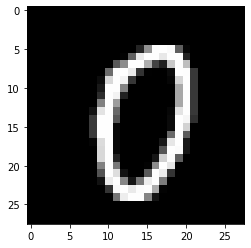

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1



```
# This is formatted as code
```

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
X_train_lt5 = X_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
X_test_lt5 = X_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

X_train_gte5 = X_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5     
X_test_gte5 = X_test[y_test >= 5]              
y_test_gte5 = y_test[y_test >= 5] - 5

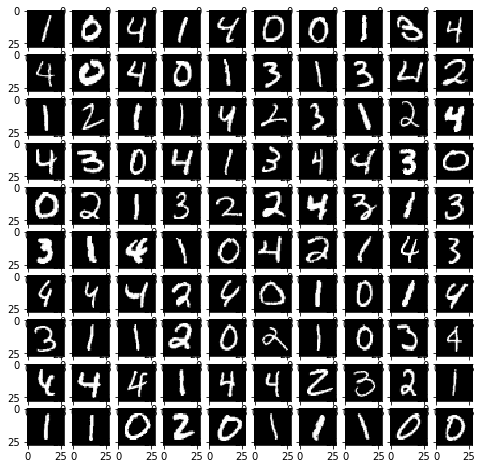

In [0]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_test_lt5[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

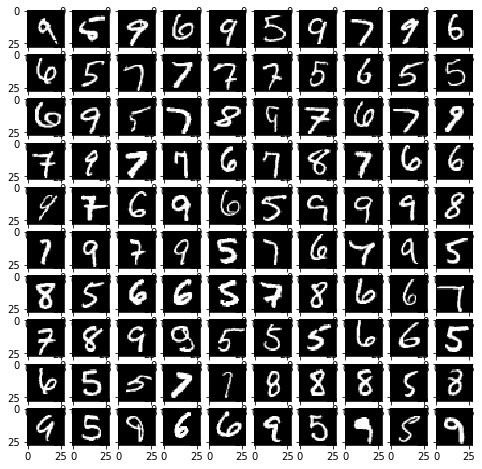

In [0]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_test_gte5[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [0]:
print(X_train_lt5.shape)
print(y_train_lt5.shape)
print(X_test_lt5.shape)
print(y_test_lt5.shape)

(30596, 28, 28)
(30596,)
(5139, 28, 28)
(5139,)


In [0]:
print(X_train_gte5.shape)
print(y_train_gte5.shape)
print(X_test_gte5.shape)
print(y_test_gte5.shape)

(29404, 28, 28)
(29404,)
(4861, 28, 28)
(4861,)


## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
X_train = X_train_lt5.reshape(X_train_lt5.shape[0], 28, 28, 1)
X_test = X_test_lt5.reshape(X_test_lt5.shape[0], 28, 28, 1)

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [0]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
y_train = tensorflow.keras.utils.to_categorical(y_train_lt5,5)
y_test = tensorflow.keras.utils.to_categorical(y_test_lt5,5)

## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

In [0]:
tf.keras.backend.clear_session()


In [0]:
batch_size = 128
num_classes = 5
epochs = 10

In [0]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1),name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25,name='drop_1'))

## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [0]:
#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.2 probability 
model.add(Dropout(0.2,name='drop_2'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax',name='dense_2'))

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [0]:
#Training on the dataset
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 2s 58us/sample - loss: 0.1163 - accuracy: 0.9646 - val_loss: 0.0166 - val_accuracy: 0.9946
Epoch 2/10
30596/30596 [==============================] - 1s 44us/sample - loss: 0.0281 - accuracy: 0.9916 - val_loss: 0.0117 - val_accuracy: 0.9965
Epoch 3/10
30596/30596 [==============================] - 1s 44us/sample - loss: 0.0169 - accuracy: 0.9947 - val_loss: 0.0101 - val_accuracy: 0.9965
Epoch 4/10
30596/30596 [==============================] - 1s 44us/sample - loss: 0.0115 - accuracy: 0.9964 - val_loss: 0.0084 - val_accuracy: 0.9973
Epoch 5/10
30596/30596 [==============================] - 1s 44us/sample - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0042 - val_accuracy: 0.9990
Epoch 6/10
30596/30596 [==============================] - 1s 43us/sample - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0057 - val_accuracy: 0.9979
Epoch 7/10
30596/30596 [==============================] -

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [0]:
#Testing the model on test set
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5139/5139 [==============================] - 0s 74us/sample - loss: 0.0075 - accuracy: 0.9977
Test loss: 0.007510769576315465
Test accuracy: 0.9976649


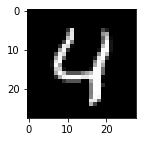

4


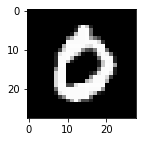

0


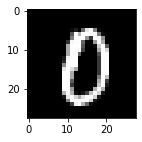

0


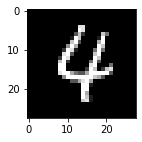

4


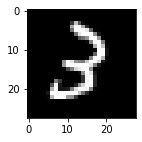

3


In [0]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(X_test[3].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test[3].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_test[2].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test[2].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_test[33].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test[33].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_test[59].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test[59].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_test[36].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test[36].reshape(1,28,28,1))))

In [0]:
#Set the path where you want to store the model and weights. 
model.save('./cnn_r8_lab.h5')
model.save_weights('./cnn_r8_lab.h5')

## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import h5py

In [0]:
tf.keras.backend.clear_session()


In [0]:
#Freezing layers in the model which don't have 'dense' in their name # we have bulit architecture same as mnist and now we need to learn only fully connected layer and not the convolution layers as that has already been learned using MNIST model
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv_1
False
conv_2
False
max_1
False
drop_1
False
flatten
False
dense_1
True
drop_2
False
dense_2
True


In [0]:
print('--- THE DATA ---')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

--- THE DATA ---
X_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples


### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [0]:
X_train_gte5 = X_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5       # make classes start at 0 for
X_test_gte5 = X_test[y_test >= 5]              # np_utils.to_categorical
y_test_gte5 = y_test[y_test >= 5] - 5

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
X_train = X_train_gte5.reshape(X_train_gte5.shape[0], 28, 28, 1)
X_test = X_test_gte5.reshape(X_test_gte5.shape[0], 28, 28, 1)

In [0]:
print('--- THE DATA ---')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

--- THE DATA ---
X_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples


### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [0]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [0]:
print('--- THE DATA ---')
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

--- THE DATA ---
X_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
y_train = tensorflow.keras.utils.to_categorical(y_train_gte5,5)
y_test = tensorflow.keras.utils.to_categorical(y_test_gte5,5)

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [0]:
#Training on the dataset
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 1s 45us/sample - loss: 0.2009 - accuracy: 0.9523 - val_loss: 0.0362 - val_accuracy: 0.9877
Epoch 2/10
29404/29404 [==============================] - 1s 45us/sample - loss: 0.0423 - accuracy: 0.9862 - val_loss: 0.0299 - val_accuracy: 0.9905
Epoch 3/10
29404/29404 [==============================] - 1s 44us/sample - loss: 0.0294 - accuracy: 0.9906 - val_loss: 0.0224 - val_accuracy: 0.9920
Epoch 4/10
29404/29404 [==============================] - 1s 44us/sample - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.0224 - val_accuracy: 0.9926
Epoch 5/10
29404/29404 [==============================] - 1s 44us/sample - loss: 0.0172 - accuracy: 0.9948 - val_loss: 0.0192 - val_accuracy: 0.9944
Epoch 6/10
29404/29404 [==============================] - 1s 44us/sample - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.0200 - val_accuracy: 0.9936
Epoch 7/10
29404/29404 [==============================] -

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [0]:
#Testing the model on test set
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4861/4861 [==============================] - 0s 75us/sample - loss: 0.0218 - accuracy: 0.9932
Test loss: 0.021753886769982946
Test accuracy: 0.99321127


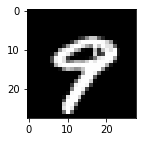

4


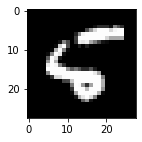

0


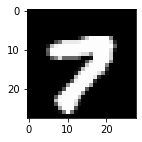

2


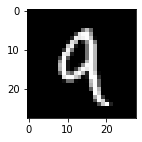

4


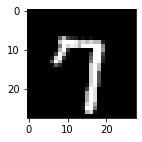

2


In [0]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(X_test[3].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test[3].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_test[2].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test[2].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_test[33].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test[33].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_test[59].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test[59].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(X_test[36].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(X_test[36].reshape(1,28,28,1))))

-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [0]:
import numpy as np
import pandas as pd

import seaborn as sns
import os
%matplotlib inline 

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/12jan/tweets.csv', encoding='Latin')

In [4]:
data.shape

(9093, 3)

In [5]:
data

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


### Drop null values
- drop all the rows with null values

In [0]:
data = data.dropna()

In [8]:
data.shape

(3291, 3)

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [9]:
data.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [0]:
data=data.applymap(lambda s:s.lower())

In [15]:
data=data.applymap(lambda s: re.sub('[^0-9a-z #+_]', "", s))

NameError: ignored

print dataframe

## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

### Fit the classifer
- fit logistic regression classifier

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

### Fit the classifer
- fit naive bayes classifier

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score